In [68]:
# Cleaning WhatsApp log
import os
import re
import pandas as pd
import numpy as np

watsup_file = 'C:/Users/Krishna/Desktop/notebook/whatsapp_data/krishna_group.txt'


# Read WhatsApp file
if os.path.exists(watsup_file):
        file_data = open(watsup_file,'r', encoding="utf8")
        watsup_content = file_data.read()

# Get date
date_regex=re.compile(r'(\d+/\d+/\d+)')
date=date_regex.findall(watsup_content)

# print(date)

# Get time
time_regex=re.compile(r'(\d{1,2}:\d{2} AM|PM)')
time=time_regex.findall(watsup_content)

# print(time)

# Get Users
user_regex=re.compile(r'-(.*?):')
user=user_regex.findall(watsup_content)

#print(user)

# Get Message
message_regex=re.compile(r'([^:]+):?$')

me_regex=re.compile(r"(\n)(?<=)(\d+/\d+/\d+)(.*)")
mess=me_regex.findall(watsup_content)

message = [''.join(message_regex.findall(''.join(msg))).strip() for msg in mess]
     
data=[]
for w,x,y,z in zip(date,time,user,message):
    data.append([str(w),str(x),str(y),str(z)])
    
# Create DataFrame from WhatsApp content
df=pd.DataFrame(data,columns=("Date","Time","User","Message"))

# Let's clean our Message
df['Message']=df['Message'].str.replace('\'(.*?): ','')

# Get Year from Date
df['Date'] = pd.to_datetime(df['Date'])
df['Year']=df['Date'].dt.year

# Get Month from Date
df['Month']=df['Date'].dt.month

# Get Day from Date
df['Day']=df['Date'].dt.day

# Get Hours of the Day
# df['Time'] = pd.to_datetime(df['Time'])
#df['Hours']=df.Time.apply(lambda x: x.hour)

# Message words
df['Words'] = df['Message'].str.strip().str.split('[\W_]+')

# Word length
df['Word Length'] = df['Words'].apply(len)-2

# Get the Length of Message
df['Message Characters'] = df['Message'].map(str).apply(len)-3

# Get Media shared in the Message
df['Media']=df['Message'].str.contains('<Media omitted>')

# Save the DataFrame to a csv file
df.to_csv("sam.csv")

In [69]:
print(df.head())

        Date     Time                  User                   Message  Year  \
0 2018-03-28  6:59 AM       Fri Santosh Cse  Waiting for this message  2018   
1 2018-03-28  6:59 AM   Abhinav Mississippi              Good morning  2018   
2 2018-03-28  7:41 AM     Fri Saikumar Jntu           <Media omitted>  2018   
3 2018-03-28       PM     Fri Saikumar Jntu            Entha raa adhi  2018   
4 2018-03-28       PM       Fri Santosh Cse            Cost telidu...  2018   

   Month  Day                          Words  Word Length  Message Characters  \
0      3   28  [Waiting, for, this, message]            2                  21   
1      3   28                [Good, morning]            0                   9   
2      3   28           [, Media, omitted, ]            2                  12   
3      3   28             [Entha, raa, adhi]            1                  11   
4      3   28               [Cost, telidu, ]            1                  11   

   Media  
0  False  
1  False  
2   T

In [33]:
print(df.shape[0])

10


In [35]:
print(df.describe())

         Year  Month   Day      Hours  Word Length  Message Characters
count    10.0   10.0  10.0  10.000000    10.000000           10.000000
mean   2018.0    3.0  31.0   8.600000     1.300000           18.700000
std       0.0    0.0   0.0   0.516398     0.483046            3.267687
min    2018.0    3.0  31.0   8.000000     1.000000           13.000000
25%    2018.0    3.0  31.0   8.000000     1.000000           17.500000
50%    2018.0    3.0  31.0   9.000000     1.000000           19.000000
75%    2018.0    3.0  31.0   9.000000     1.750000           19.000000
max    2018.0    3.0  31.0   9.000000     2.000000           24.000000


In [36]:
print(df.columns)

Index(['Date', 'Time', 'User', 'Message', 'Year', 'Month', 'Day', 'Hours',
       'Words', 'Word Length', 'Message Characters', 'Media'],
      dtype='object')


In [38]:
#Summary by dates
days=df.groupby('Date')['Date'].count()
print(days)

[Date
2018-03-31    10
Name: Date, dtype: int64]


In [39]:
# Summary By User
users=df.groupby('User')['User'].count()
print(users)

User
 Cse Mounya             1
 Cse Shailaja Cse       1
 Cse Shirisha           1
 Cse Shwetha Diploma    1
 Cse Sindhura Gdk       1
 Cse Srujana            1
 Fri M. karthik         1
 Fri Rajashaker Cse     1
 Fri Yacob Cse          1
 Lalli                  1
Name: User, dtype: int64


In [40]:
#Summary by message

message=df.groupby('User')['Message'].count()
print(message)

User
 Cse Mounya             1
 Cse Shailaja Cse       1
 Cse Shirisha           1
 Cse Shwetha Diploma    1
 Cse Sindhura Gdk       1
 Cse Srujana            1
 Fri M. karthik         1
 Fri Rajashaker Cse     1
 Fri Yacob Cse          1
 Lalli                  1
Name: Message, dtype: int64


In [41]:
#Summary by Year
year=df.groupby('Year')['Year'].count()
print(year)

Year
2018    10
Name: Year, dtype: int64


In [43]:
# SUmmary by Month
month =df.groupby(['Month'])['Month'].count()
print(month)

Month
3    10
Name: Month, dtype: int64


In [44]:
#Summary by Month and Year

month=df.groupby(['Year','Month'])['Month'].count()
print(month)

Year  Month
2018  3        10
Name: Month, dtype: int64


In [45]:
#Summary by Day

year_month=df.groupby(['Year','Day'])['Day'].count()
print(year_month)

Year  Day
2018  31     10
Name: Day, dtype: int64


In [47]:
#Summary By hour
date_hour=df.groupby(['Date','Hours'])['Hours'].count()
print(date_hour)

Date        Hours
2018-03-31  8        4
            9        6
Name: Hours, dtype: int64


In [48]:
#Summary by Message character length

char_length=df.groupby(['User'])['Message Characters'].sum()
print(char_length)

User
 Cse Mounya             19
 Cse Shailaja Cse       23
 Cse Shirisha           19
 Cse Shwetha Diploma    19
 Cse Sindhura Gdk       19
 Cse Srujana            19
 Fri M. karthik         15
 Fri Rajashaker Cse     13
 Fri Yacob Cse          24
 Lalli                  17
Name: Message Characters, dtype: int64


In [49]:
#Summary by Message word length and User

char_length=df.groupby(['User'])['Word Length'].sum()
print(char_length)

User
 Cse Mounya             1
 Cse Shailaja Cse       2
 Cse Shirisha           1
 Cse Shwetha Diploma    1
 Cse Sindhura Gdk       1
 Cse Srujana            1
 Fri M. karthik         1
 Fri Rajashaker Cse     2
 Fri Yacob Cse          2
 Lalli                  1
Name: Word Length, dtype: int64


In [50]:
#Summary by Media shared

media=df.groupby(['Media'])['Media'].sum()
print(media)

Media
False    False
Name: Media, dtype: bool


In [52]:
#Summary by Media shared per user

media_df=df[df['Media']==True]
media_per_user=media_df.groupby(['User','Media'])['Media'].count()
print(media_per_user)

Series([], Name: Media, dtype: int64)


In [54]:
# Summary by Media shared per month
media_df=df[df['Media']==True]
media_per_month=media_df.groupby(['Year','Month','Media'])['Media'].count()
print(media_per_month)

Series([], Name: Media, dtype: int64)


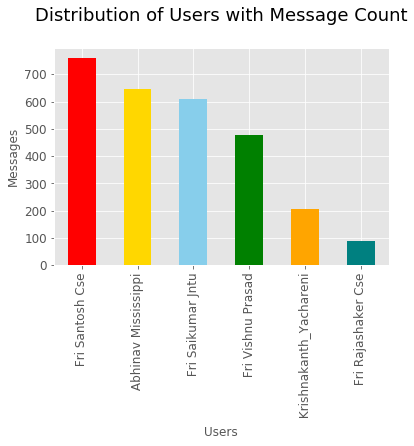

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
 
users=df.groupby('User')['User'].count().nlargest(10)
 
def bar_chart(users):
    ax = users.plot(kind='bar', color = ['red','gold','skyblue','green','orange','teal','cyan','lime','orangered','aqua'], fontsize=12)
    ax.set_title("WhatsApp Users with Message Count\n", fontsize=18)
    ax.set_xlabel("Users", fontsize=12)
    ax.set_ylabel("Messages", fontsize=12)
    plt.show()
    #plt.savefig('whatsapp.png')
 
bar_chart(users)

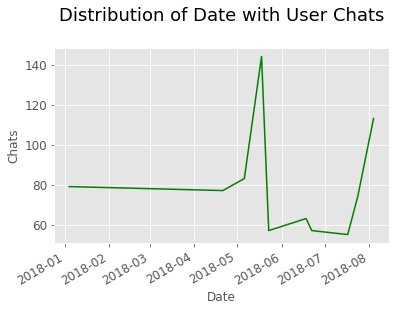

In [76]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

date=df.groupby('Date')['Date'].count().nlargest(10)
def user_line_chart(date):
    ax = date.plot(kind='line',color='green', fontsize=12)
    ax.set_title("Distribution of Date with User Chats\n", fontsize=18)
    ax.set_xlabel("Date", fontsize=12)
    ax.set_ylabel("Chats", fontsize=12)
    plt.show()

user_line_chart(date)

### User Chats Pie Chart

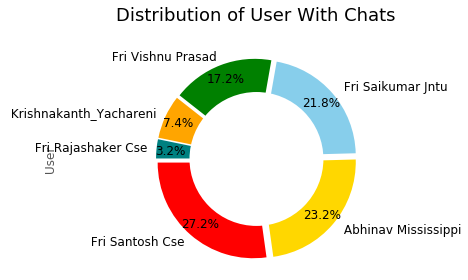

In [79]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

user=df.groupby('User')['User'].count().nlargest(10)

def user_chat_pie(user):
    fig, ax = plt.subplots()
    explodex = []
    for i in np.arange(len(user)):
        explodex.append(0.05)
    ax = user.plot(kind='pie', colors = ['red','gold','skyblue','green','orange','teal','cyan','lime','orangered','aqua'], fontsize=12, autopct='%1.1f%%', startangle=180, pctdistance=0.85, explode = explodex)
    inner_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(inner_circle)
    ax.axis('equal')  
    ax.set_title("Distribution of User With Chats\n", fontsize=18)
    plt.tight_layout()
    plt.show()
    plt.savefig('pie.png',bbox_inches='tight')
user_chat_pie(user)

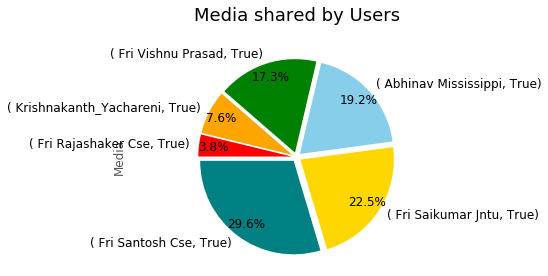

In [80]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

media_df=df[df['Media']==True]
media_per_user_group=media_df.groupby(['User','Media'])['Media'].count().nlargest(10)

def media_shared_pie(media_per_user_group):
    fig, ax = plt.subplots()
    explodex = []
    for i in np.arange(len(media_per_user_group)):
        explodex.append(0.05)
    ax = media_per_user_group.plot(kind='pie', colors = ['teal','gold','skyblue','green','orange','red','cyan','lime','orangered','aqua'], fontsize=12, autopct='%1.1f%%', startangle=180, pctdistance=0.85,explode=explodex)
    ax.axis('equal')  
    ax.set_title("Media shared by Users\n", fontsize=18)
    plt.show()

media_shared_pie(media_per_user_group)

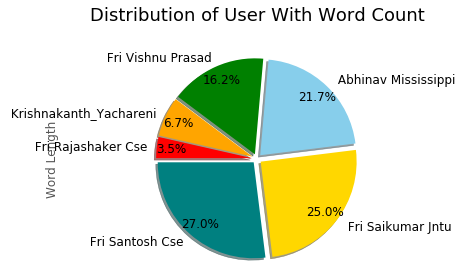

In [81]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

word_count=df.groupby(['User'])['Word Length'].sum().nlargest(10)

def pie_chart(word_count):
    fig, ax = plt.subplots()
    explodex = []
    for i in np.arange(len(word_count)):
        explodex.append(0.05)
    ax = word_count.plot(kind='pie', colors = ['teal','gold','skyblue','green','orange','red','cyan','lime','orangered','aqua'],shadow=True, fontsize=12, autopct='%1.1f%%', startangle=180, pctdistance=0.85, explode = explodex)
    ax.axis('equal')  
    ax.set_title("Distribution of User With Word Count\n", fontsize=18)
    plt.tight_layout()
    plt.show()

pie_chart(word_count)

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

active_hour=df.groupby(['Date','Hours'])['Hours'].count().nlargest(10)

def active_hours_bar_chart(active_hour):
    ax = active_hour.plot(kind='bar', color = ['aqua','gold','skyblue','green','orange','red','cyan','lime','orangered','teal'], fontsize=12)
    ax.set_title("Active Hour\n", fontsize=18)
    ax.set_xlabel("Date", fontsize=12)
    ax.set_ylabel("Chats", fontsize=12)
    plt.show()

active_hours_bar_chart(active_hour)

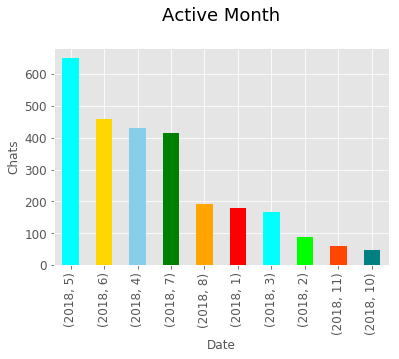

In [83]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

active_month=df.groupby(['Year','Month'])['Month'].count().nlargest(10)

def active_month_bar_chart(active_month):
    ax = active_month.plot(kind='bar', color = ['aqua','gold','skyblue','green','orange','red','cyan','lime','orangered','teal'], fontsize=12)
    ax.set_title("Active Month\n", fontsize=18)
    ax.set_xlabel("Date", fontsize=12)
    ax.set_ylabel("Chats", fontsize=12)
    plt.show()

active_month_bar_chart(active_month)

### Active Hours Line Chart



In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

active_hour_line_group=df.groupby(['Day','Hours'])['Hours'].count()
def active_hour_line_chart(active_hour_line_group):
    ax = active_hour_line_group.plot(kind='line',color='orange', fontsize=12)
    ax.set_title("Active Hour\n", fontsize=18)
    ax.set_xlabel("(Day,Hour)", fontsize=12)
    ax.set_ylabel("Chats", fontsize=12)
    plt.show()
active_hour_line_chart(active_hour_line_group)